### **California housing dataset** 

This notebook introduces California housing dataset that we will be using for regression demonstration.

We also list down the steps for typical dataset exploration, which can be applied broadly to any dataset.

### **Loading the dataset**

This dataset can be fetched from sklearn with `fetch_california_housing` API.

In [1]:
from sklearn.datasets import fetch_california_housing
from scipy.stats import loguniform
from scipy.stats import uniform

In order to analyze the dataset, let's load it as a dataframe. 

In [2]:
california_housing = fetch_california_housing(as_frame=True)
type(california_housing)

sklearn.utils._bunch.Bunch

The bunch object is a dictionary like object with the following attributes:
* `data`, is a pandas object (since `as_frame=True`). 

* Each row corresponds to 8 features values.

* `target` value contains average house value in units of 100_000. This is also a pandas object (since `as_frame=True`).
* DESCR contains description of the dataset.
* `frame` contains dataframe with data and target 

Each of these attributes can be accessed as `<bunch_object>`.key. In our case, we can access these features as follows:

* `california_housing.data` gives us access to contents of `data` key.

* `california_housing.target` gives us access to contents of `target` key. 

* `california_housing.feature_names` gives us access to contents of `feature_names` key. 

* `california_housing.DESCR` gives us access to contents of `DESCR` key. 

* `california_housing.frame` gives us access to contents of `frame` key. 


### **Dataset Exploration**

#### STEP 1: Dataset description
Let's look at the description of the dataset. 


In [3]:
print(california_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

Note down key statistics from this description such as number of examples (or sample or instances) from the description : 

* There are **20640 examples** in the dataset.

* There are **8 numberical attributes** per example

* The target label is median house value.

* There are **no missing values** in this dataset.

#### STEP 2 : Examine shape of feature matrix 

Number of examples and features can be obtained via shape of `california_housing.data`.


In [4]:
california_housing.data.shape

(20640, 8)

In [5]:
type(california_housing.data)

pandas.core.frame.DataFrame

#### STEP 3 : Examine shape of label 

Let's look at the shape of label vector.

In [6]:
california_housing.target.shape

(20640,)

In [7]:
type(california_housing.target)

pandas.core.series.Series

#### STEP 4: Get Feature names
Let's find out names of the attributes / features.

In [8]:
california_housing.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

Note the attributes and their description, which is a key step in understanding the data.

* MedInc - median income in block

* HouseAge - median house age in  block 

* AveRooms - average number of rooms 

* AveBedrms - average number of bedrooms

* Population - block population

* AveOccup - Average house occupancy

* Latitude - house block latitude 

* Longitude - house block longitude 

#### STEP 5: Examine sample training examples 

Let's look at a few training examples along with labels.

In [9]:
# frame.head() for both features and labels

california_housing.frame.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


The dataset contains aggregated data about each district in California

#### STEP 6: Examine features
Let's look at the features.

In [10]:
# data.head() for only features

california_housing.data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


We have information about : 
* Demography of each district (income, population, house occupancy,

* Location of the disctricts (latitude and longitude) & 

* Characteristics of houses in the district (#rooms, #bedrooms, age of house) 

Since the information is aggregated at the district levels, the features corresponds to average or median.

#### STEP 7: Examine target 
Let's look at the target to be predicted.

In [11]:
# target.head() for only labels

california_housing.target.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

The target contains median of the house value for each district. We can see that the target is a real number and hence this is a regression problem.

#### STEP 8: Examine details of features and labels 
Let's look at the details of features and target labels.

In [12]:
california_housing.frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


We observe that : 
* The dataset contains 20640 examples with 8 features.

* All features are numerical features encoded as floating point numbers.

* There are no missing values in any features - the `non-null` is equal to the number of examples in the training set.


#### STEP 9: Feature and target histograms.
Let's look at the distribution of these features and target by plotting their histograms.

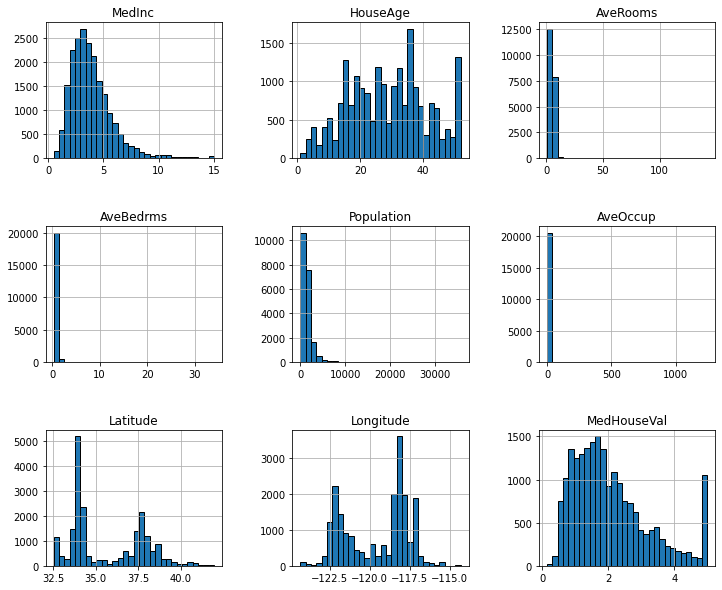

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

california_housing.frame.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.5, wspace=0.4)

Let's observe these histogram and note down our findings:

* **MedInc** has a long tail distribution-salary of people is more or less normally distributed with a few folks getting a high salary.

* **HouseAge** has more or less a uniform distribution.

* The range for features, **AveRooms, AveBedrms, AveOccups, Population**, is large and its contains a small number of large values(as there are unnoticable bins on the right in the histograms plots of these features). That would mean that there could be certain outlier values present in these features.

* **Latitude and Longitude** carry geographical information. Their combination helps us decide price of the house.

* **MedHouseVal** also has a long tail distribution. It spikes towards the end. The reason is that the houses with price more than 5 are given value of 5.


#### STEP 10: Feature and target statistics

Let's look at statistics of these features and the target.

In [14]:
california_housing.frame.describe().T

,count,mean,std,min,25%,50%,75%,max
MedInc,20640.0,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,15.000100
HouseAge,20640.0,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,52.000000
AveRooms,20640.0,5.429000,2.474173,0.846154,4.440716,5.229129,6.052381,141.909091
AveBedrms,20640.0,1.096675,0.473911,0.333333,1.006079,1.048780,1.099526,34.066667
Population,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,35682.000000
AveOccup,20640.0,3.070655,10.386050,0.692308,2.429741,2.818116,3.282261,1243.333333
Latitude,20640.0,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,41.950000
Longitude,20640.0,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-114.310000
MedHouseVal,20640.0,2.068558,1.153956,0.149990,1.196000,1.797000,2.647250,5.000010


We can observe that there is a large difference between 75% and `max` values of `AveRooms`, `AveBedrms`, `population` and `AveOccups`- which confirms our intuition about presence of outliers or extreme values in these features.

#### STEP 11 : Pairplot

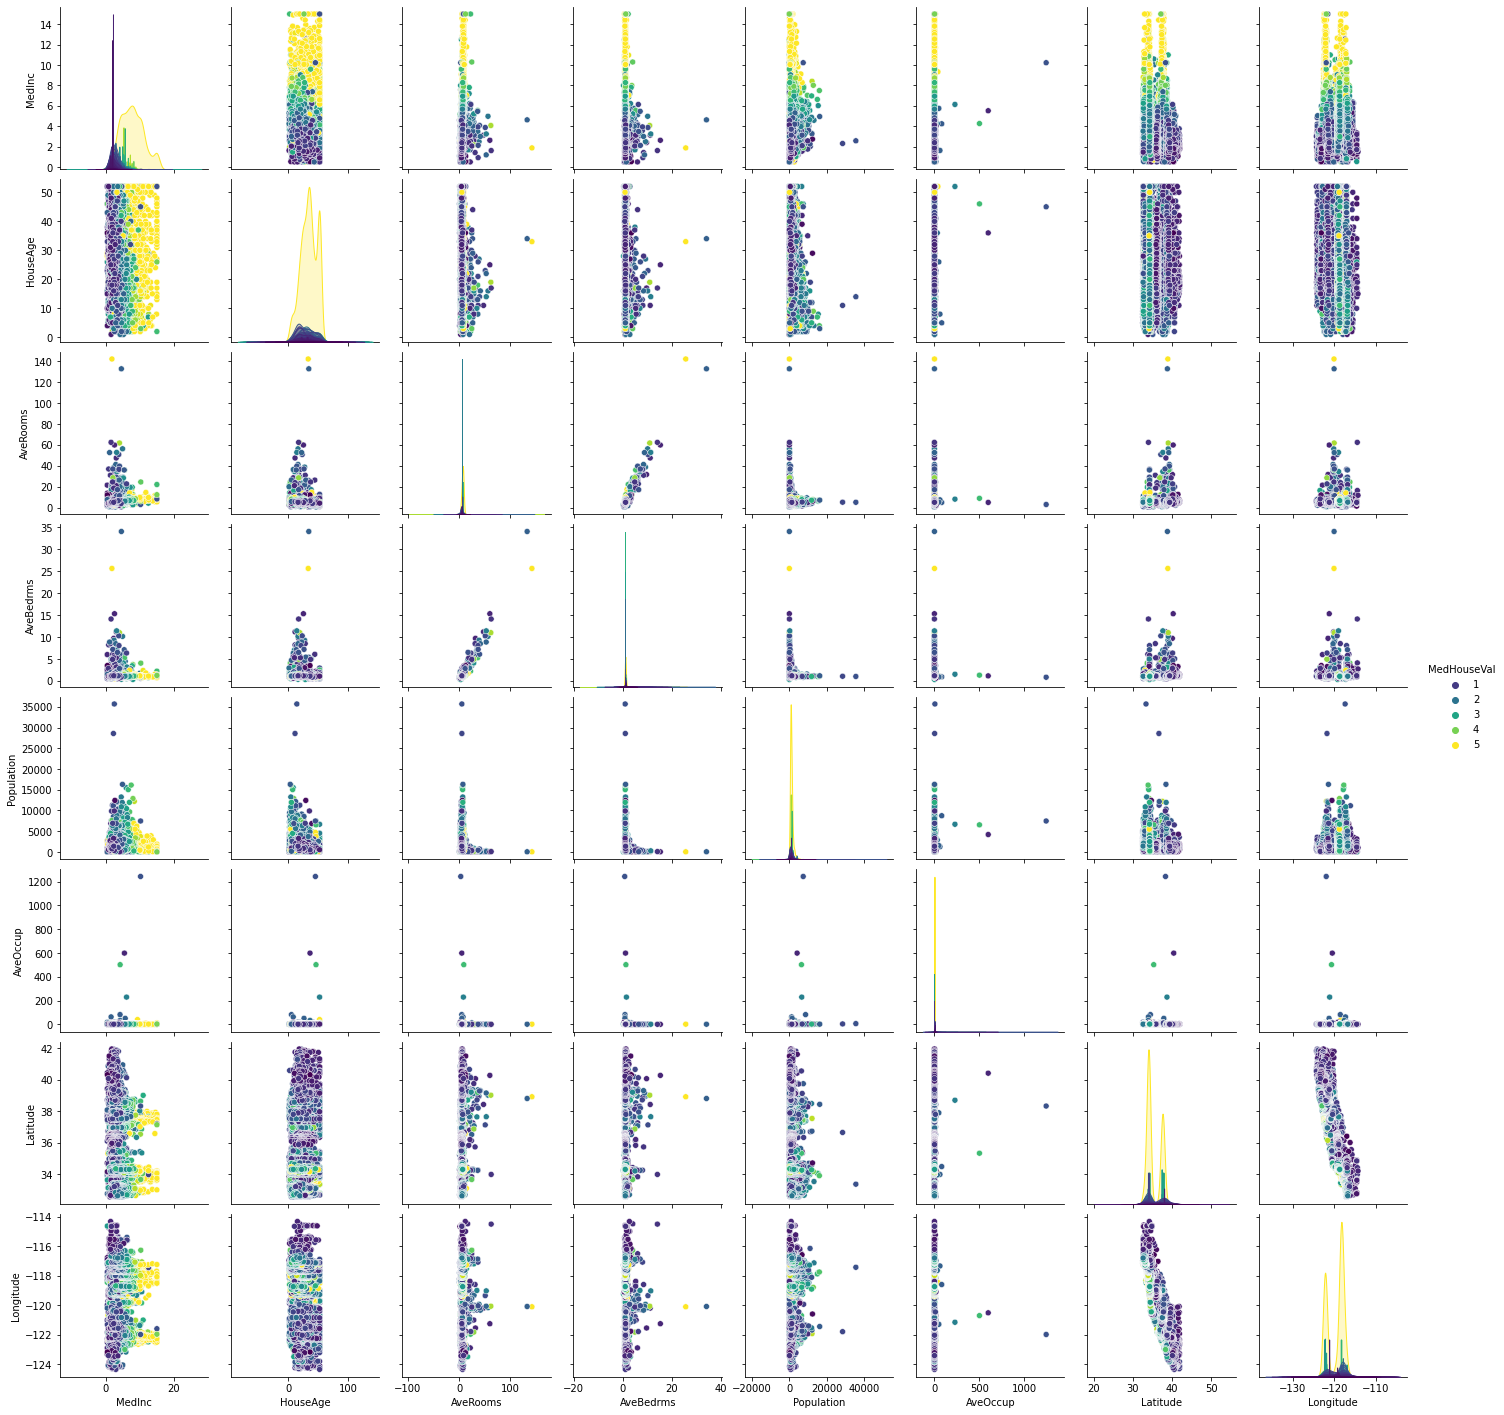

In [15]:
_ = sns.pairplot(data=california_housing.frame, hue = 'MedHouseVal', palette='viridis')

A few observations based on pairplot:

* `MedIncome` seems to be useful in distinguishing between low and high valued houses.

* A few features have extreme values.

* Latitude and logitude together seem to distinguish between low and high valued houses.


### Summary 
* Explored california housing dataset that would be used for demonstrating implementation of linear regression models.

* Examined various statistics of the dataset - #samples, #labels 
* Examined distribution of features through histogram and pairplots.